Вчитување на библиотеките

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Вчитување на податочно множество Magic Gamma Telescope и преглед на првите 10 примероци и нивните податоци

In [2]:
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

file_path = r'C:\Users\milam\OneDrive - ALS Bobi\Desktop\magic+gamma+telescope\magic04.data'
magic_data = pd.read_csv(file_path, header=None, names=column_names)

magic_data.head(10)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
5   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   
6   48.2468   17.3565  3.0332  0.2529  0.1515    8.5730  38.0957   10.5868   
7   26.7897   13.7595  2.5521  0.4236  0.2174   29.6339  20.4560   -2.9292   
8   96.2327   46.5165  4.1540  0.0779  0.0390  110.3550  85.0486   43.1844   
9   46.7619   15.1993  2.5786  0.3377  0.1913   24.7548  43.8771   -6.6812   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
5   3.6130  238.0980     g  
6   4.7920  219.0870     g  
7   0.8120  237.1340     g  
8   4.8540  248.2260     g  
9   7.8750  102.2510     g

In [3]:
label_encoder = LabelEncoder()
magic_data['class'] = label_encoder.fit_transform(magic_data['class'])
X = magic_data.drop('class', axis=1)
y = magic_data['class']

feature_names = X.columns.tolist()
target_names = label_encoder.classes_.tolist()

number_of_classes = len(target_names)
number_of_features = len(feature_names)
number_of_instances = X.shape[0]

print("Number and names of classes:", number_of_classes, target_names)
print("Number and names of attributes:", number_of_features, feature_names)
print("Number of data samples:", number_of_instances)

Number and names of classes: 2 ['g', 'h']
Number and names of attributes: 10 ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
Number of data samples: 19020


Проверка на корелацијата помеѓу атрибутите и класите

In [4]:
magic_data.corr()

fLength    fWidth     fSize     fConc    fConc1     fAsym  \
fLength   1.000000  0.770512  0.702454 -0.630999 -0.598145 -0.368556   
fWidth    0.770512  1.000000  0.717517 -0.609779 -0.581141 -0.266961   
fSize     0.702454  0.717517  1.000000 -0.850850 -0.808835 -0.159863   
fConc    -0.630999 -0.609779 -0.850850  1.000000  0.976412  0.112272   
fConc1   -0.598145 -0.581141 -0.808835  0.976412  1.000000  0.100159   
fAsym    -0.368556 -0.266961 -0.159863  0.112272  0.100159  1.000000   
fM3Long  -0.119747 -0.176234  0.095157 -0.121899 -0.118769  0.274045   
fM3Trans  0.013389  0.039744  0.015455 -0.011294 -0.010966  0.002553   
fAlpha   -0.008777  0.066061 -0.186675  0.235272  0.229799 -0.055689   
fDist     0.418466  0.336816  0.437041 -0.328332 -0.304625 -0.206730   
class     0.307572  0.265596  0.117795 -0.024615 -0.004797 -0.173587   

           fM3Long  fM3Trans    fAlpha     fDist     class  
fLength  -0.119747  0.013389 -0.008777  0.418466  0.307572  
fWidth   -0.176234  0.039744  0.066061  0.336816  0.265596  
fSize     0.095157  0.015455 -0.186675  0.437041  0.117795  
fConc    -0.121899 -0.011294  0.235272 -0.328332 -0.024615  
fConc1   -0.118769 -0.010966  0.229799 -0.304625 -0.004797  
fAsym     0.274045  0.002553 -0.055689 -0.206730 -0.173587  
fM3Long   1.000000 -0.017197 -0.186275  0.037025 -0.193409  
fM3Trans -0.017197  1.000000  0.004659  0.011427  0.003837  
fAlpha   -0.186275  0.004659  1.000000 -0.220556  0.460979  
fDist     0.037025  0.011427 -0.220556  1.000000  0.065203  
class    -0.193409  0.003837  0.460979  0.065203  1.000000

Вадење на атрибутот fConc1 поради висока корелација со fConc

In [5]:
magic_data.drop(["fConc1"],axis=1, inplace=True)


In [14]:
X = magic_data.drop('class', axis=1)
y = magic_data['class']
feature_names = X.columns.tolist()

number_of_features = len(feature_names)

print("Number and names of attributes after deleting 'fConc1':", number_of_features, feature_names)

Number and names of attributes after deleting 'fConc1': 9 ['fLength', 'fWidth', 'fSize', 'fConc', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']


Приказ на статистиката на променливите, проверка дали има вредности кои фалат и дали множеството е балансирано

In [8]:
magic_data.describe()

fLength        fWidth         fSize         fConc         fAsym  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327     -4.331745   
std       42.364855     18.346056      0.472599      0.182813     59.206062   
min        4.283500      0.000000      1.941300      0.013100   -457.916100   
25%       24.336000     11.863800      2.477100      0.235800    -20.586550   
50%       37.147700     17.139900      2.739600      0.354150      4.013050   
75%       70.122175     24.739475      3.101600      0.503700     24.063700   
max      334.177000    256.382000      5.323300      0.893000    575.240700   

            fM3Long      fM3Trans        fAlpha         fDist         class  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      10.545545      0.249726     27.645707    193.818026      0.351630  
std       51.000118     20.827439     26.103621     74.731787      0.477492  
min     -331.780000   -205.894700      0.000000      1.282600      0.000000  
25%      -12.842775    -10.849375      5.547925    142.492250      0.000000  
50%       15.314100      0.666200     17.679500    191.851450      0.000000  
75%       35.837800     10.946425     45.883550    240.563825      1.000000  
max      238.321000    179.851000     90.000000    495.561000      1.000000

In [9]:
magic_data.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [10]:
magic_data.value_counts("class")

class
0    12332
1     6688
Name: count, dtype: int64

Бокс плотови за двете класи заедно и за секоја посебно

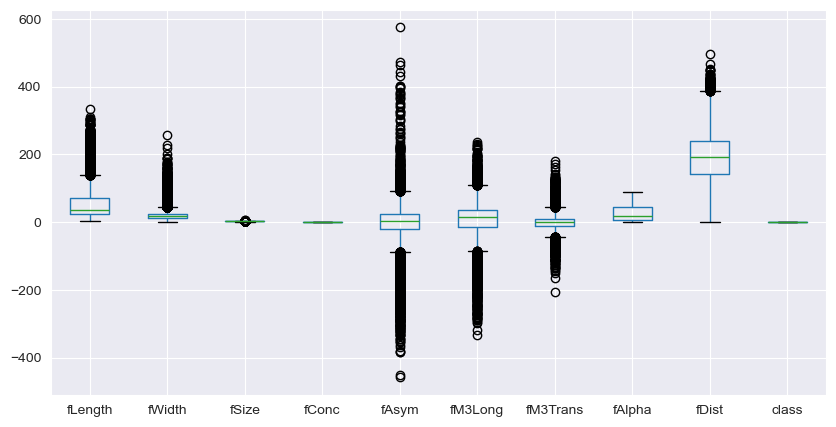

In [11]:
fig=plt.figure(figsize=(10,5))
magic_data.boxplot()
plt.show()

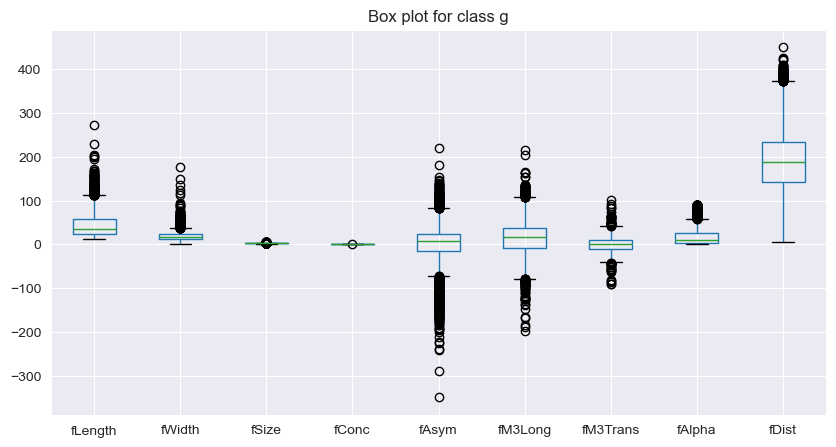

In [12]:
fig=plt.figure(figsize=(10,5))
magic_data[magic_data["class"]==0].drop(["class"], axis=1).boxplot()
plt.title("Box plot for class g")
plt.show()

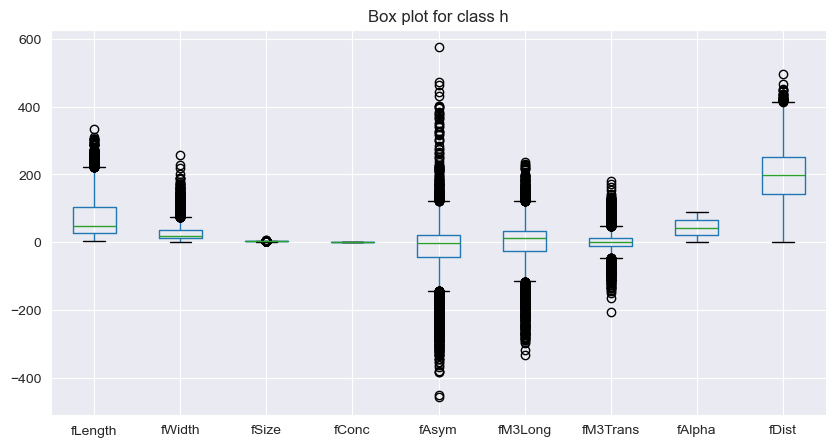

In [13]:
fig=plt.figure(figsize=(10,5))
magic_data[magic_data["class"]==1].drop(["class"], axis=1).boxplot()
plt.title("Box plot for class h")
plt.show()

Приказ на распределбата на атрибутите преку хистограм и скатер плот

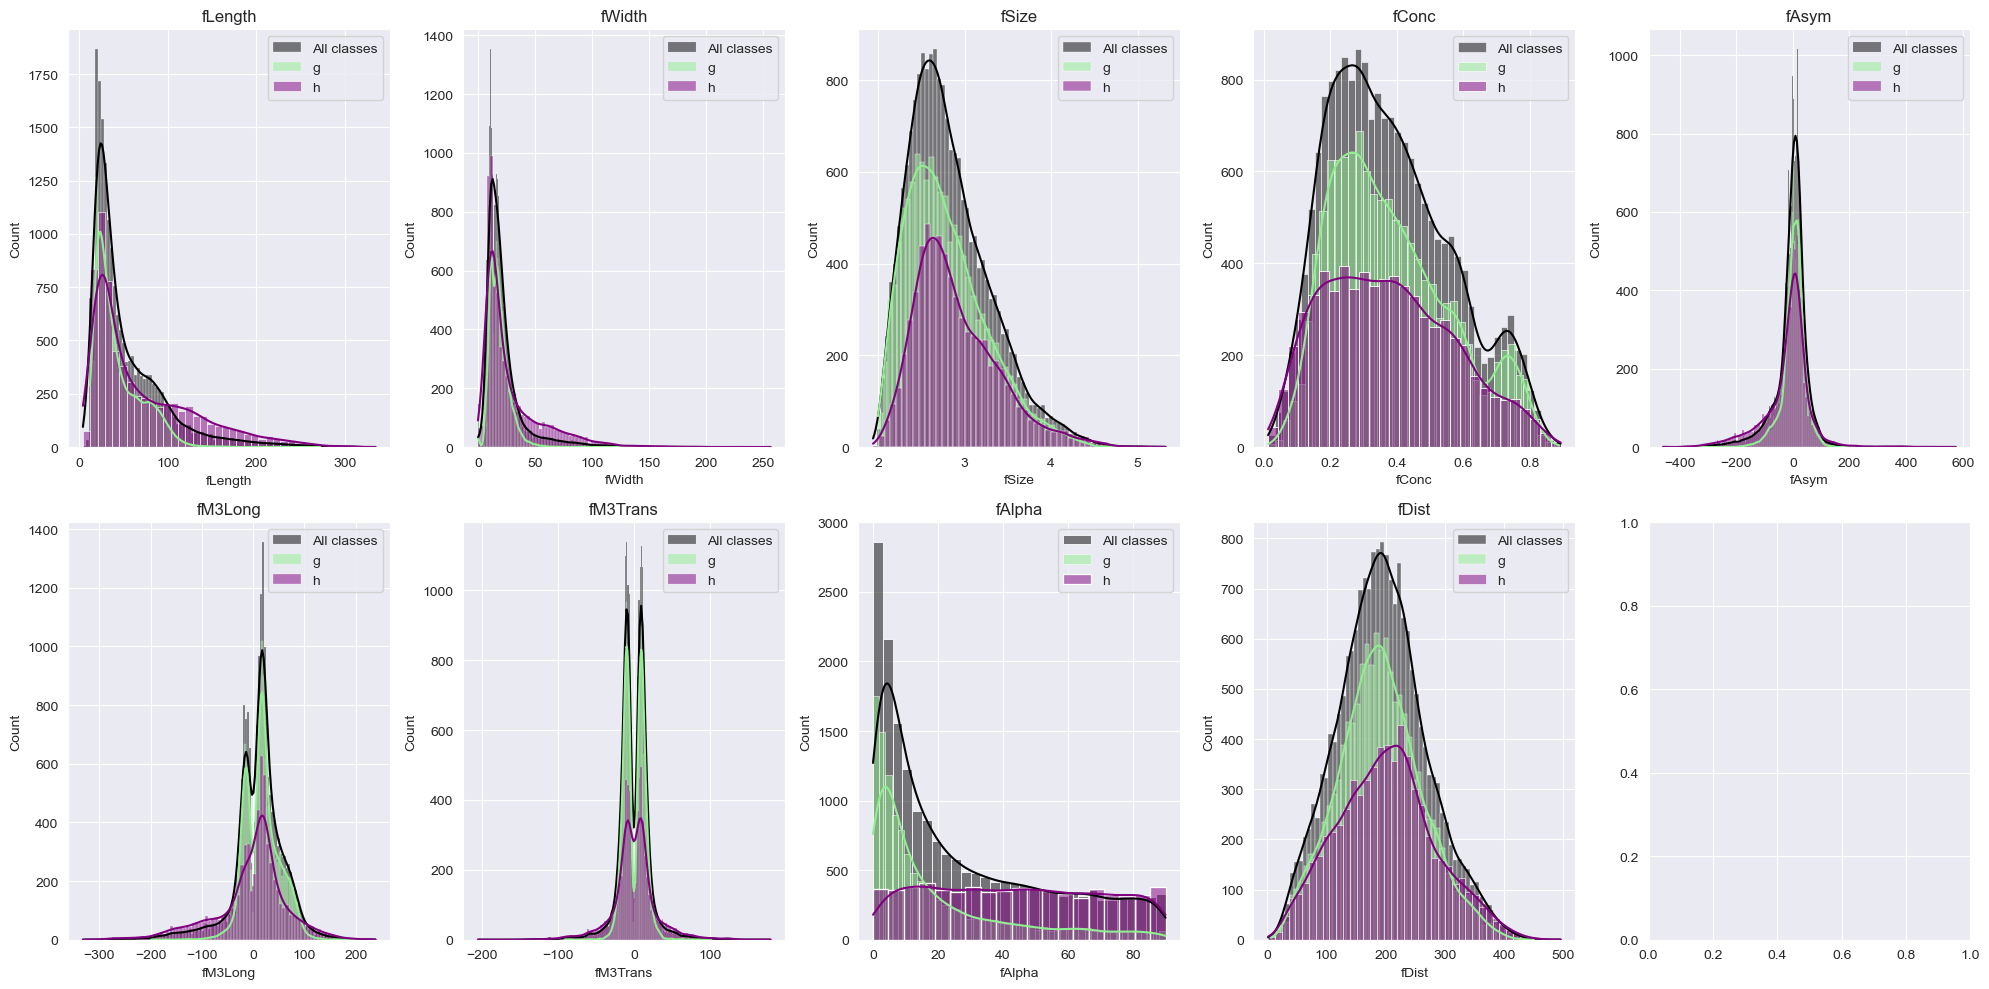

In [12]:
colors = ['lightgreen','purple']

fig = plt.figure(figsize=(20, 10))
fig.subplots(nrows=2, ncols=5)

for feature in range(number_of_features):
    ax = plt.subplot(2, 5, feature + 1)
    plt.title(feature_names[feature])
    sns.histplot(X.iloc[:, feature], color='black', label='All classes', kde=True, stat="count")
    for Class in range(number_of_classes):
        sns.histplot(X.loc[y == Class, feature_names[feature]], color=colors[Class], label=target_names[Class], kde=True, stat="count")
    plt.legend()
plt.tight_layout()
plt.show()

In [15]:
print(X.columns)

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')


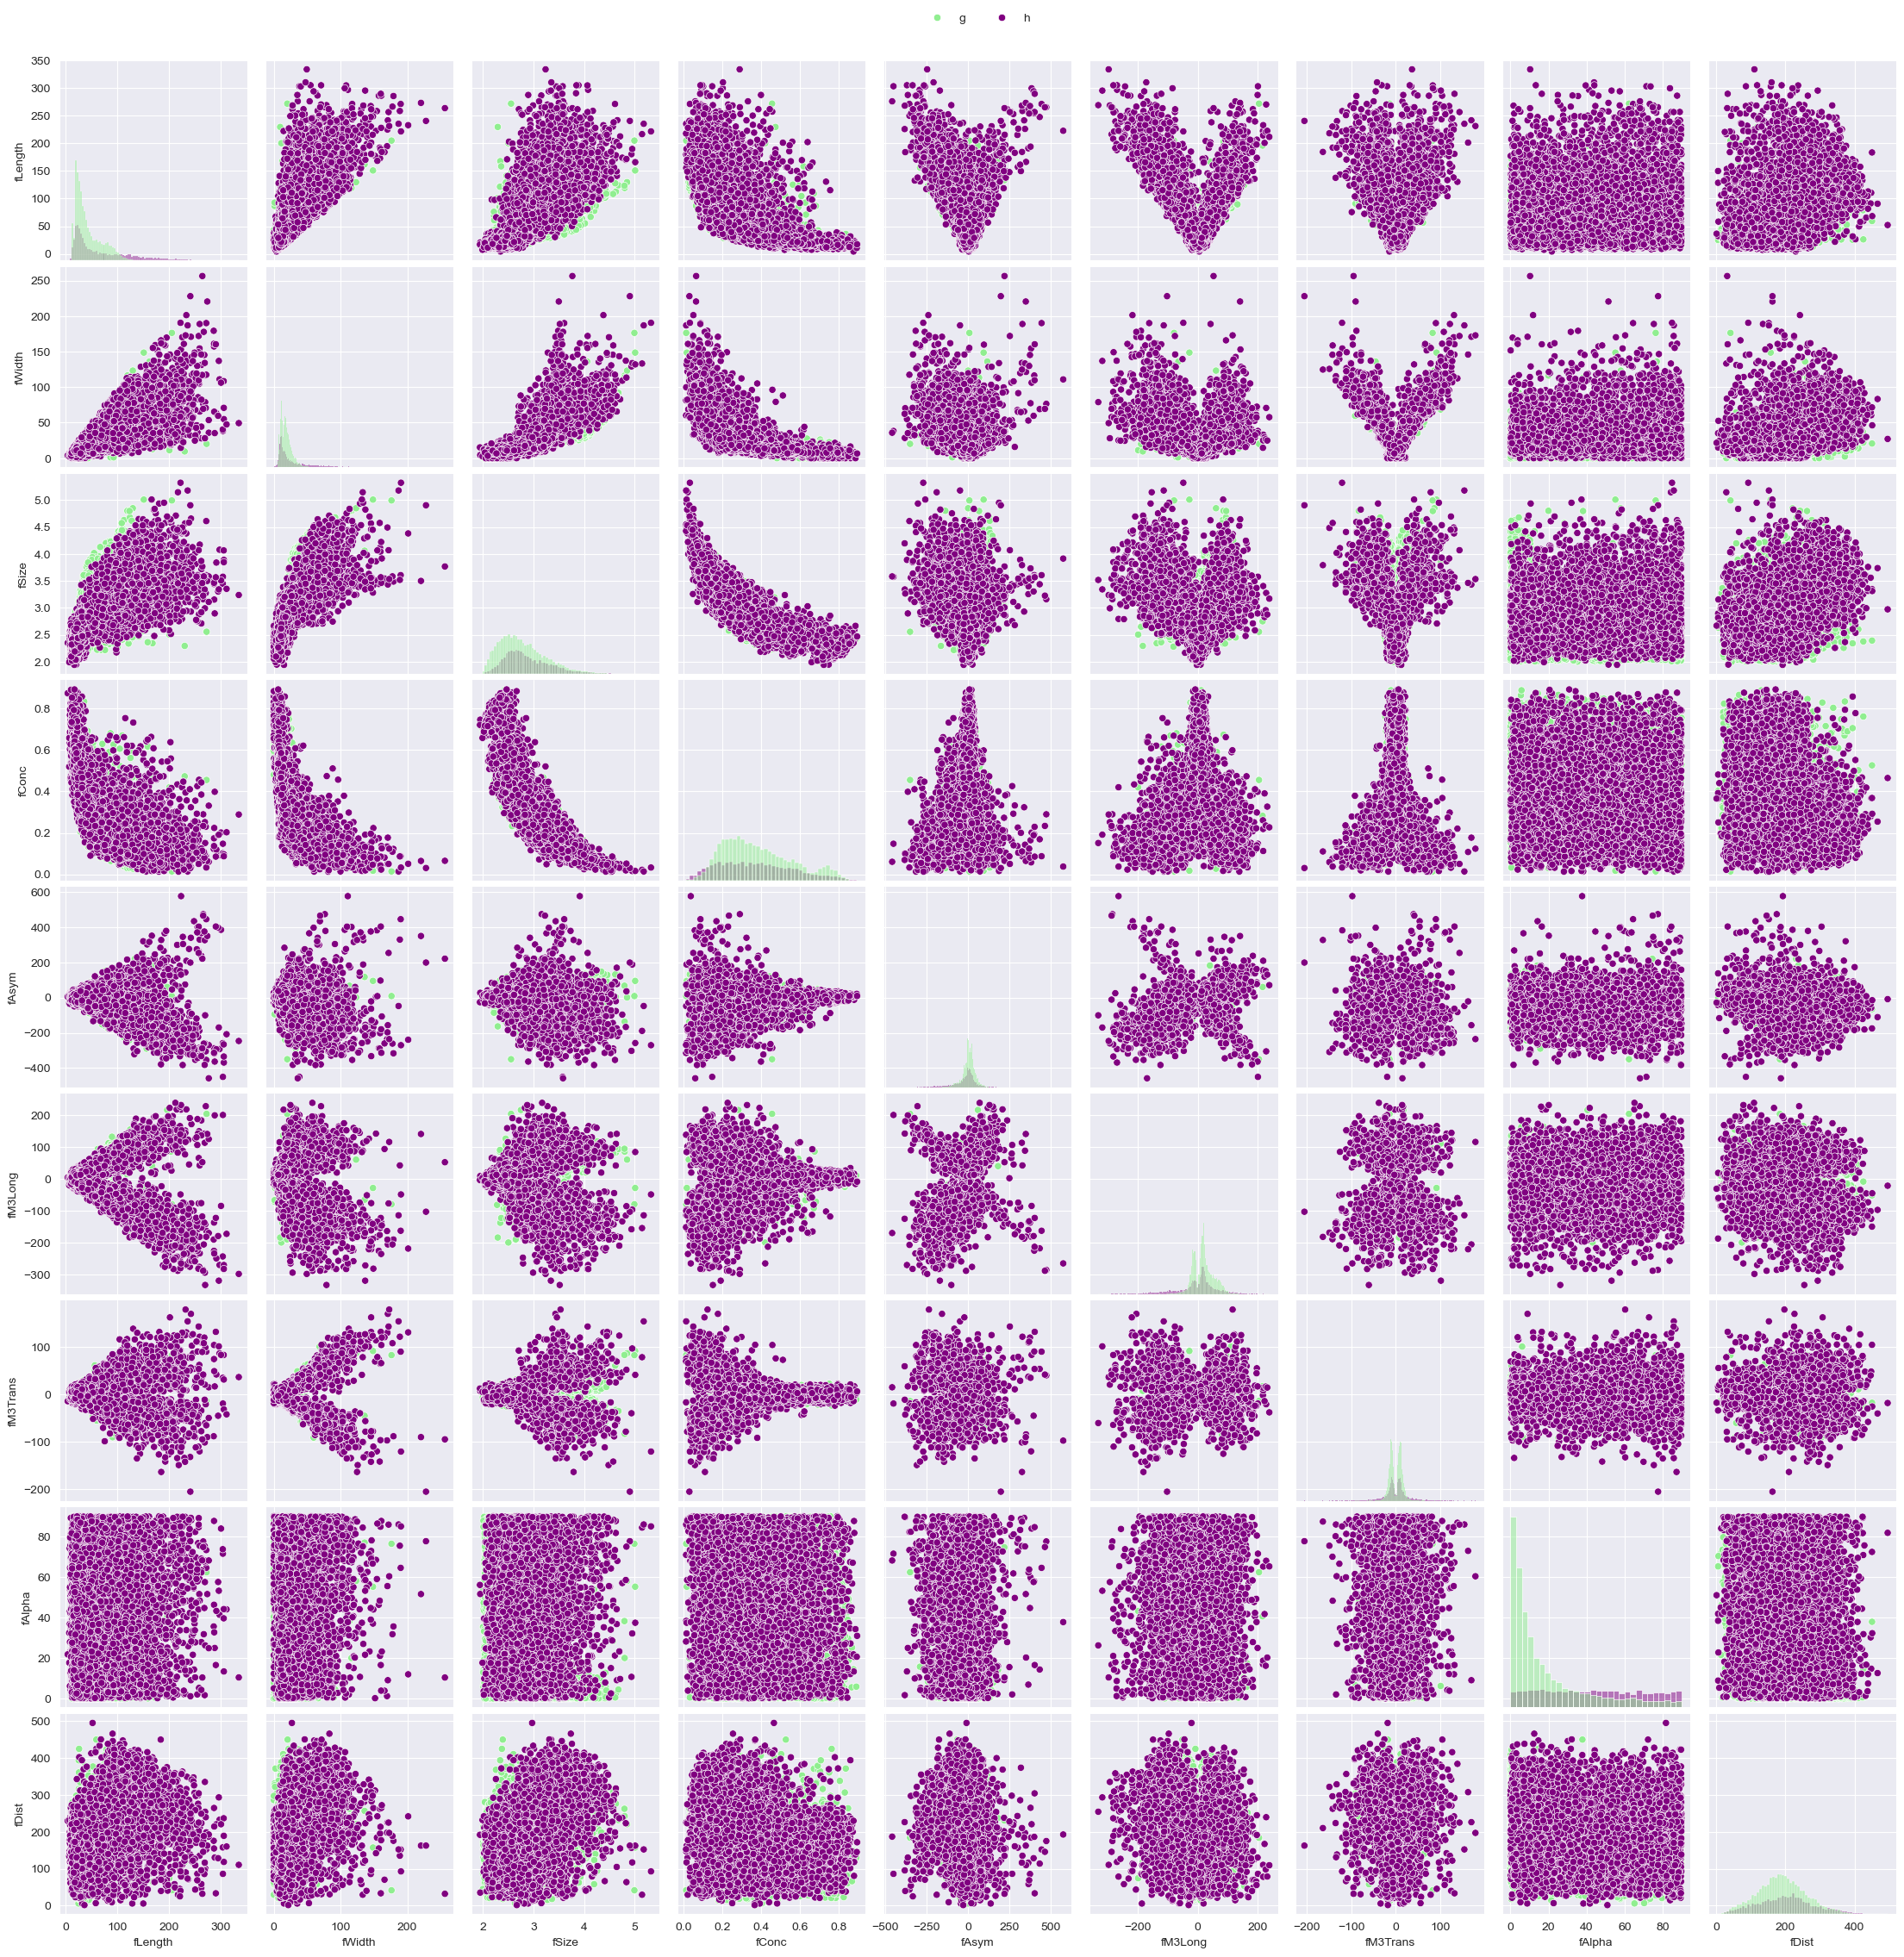

In [16]:
g=sns.pairplot(magic_data, hue="class", diag_kind="hist", palette=colors)
sns.move_legend(g,"lower center", bbox_to_anchor=(.5,1), title=None, ncol=3)

for t, l in zip(g._legend.texts, target_names):
  t.set_text(l)

Приказ на распределбата на густините на распределба за класите и атрибутите

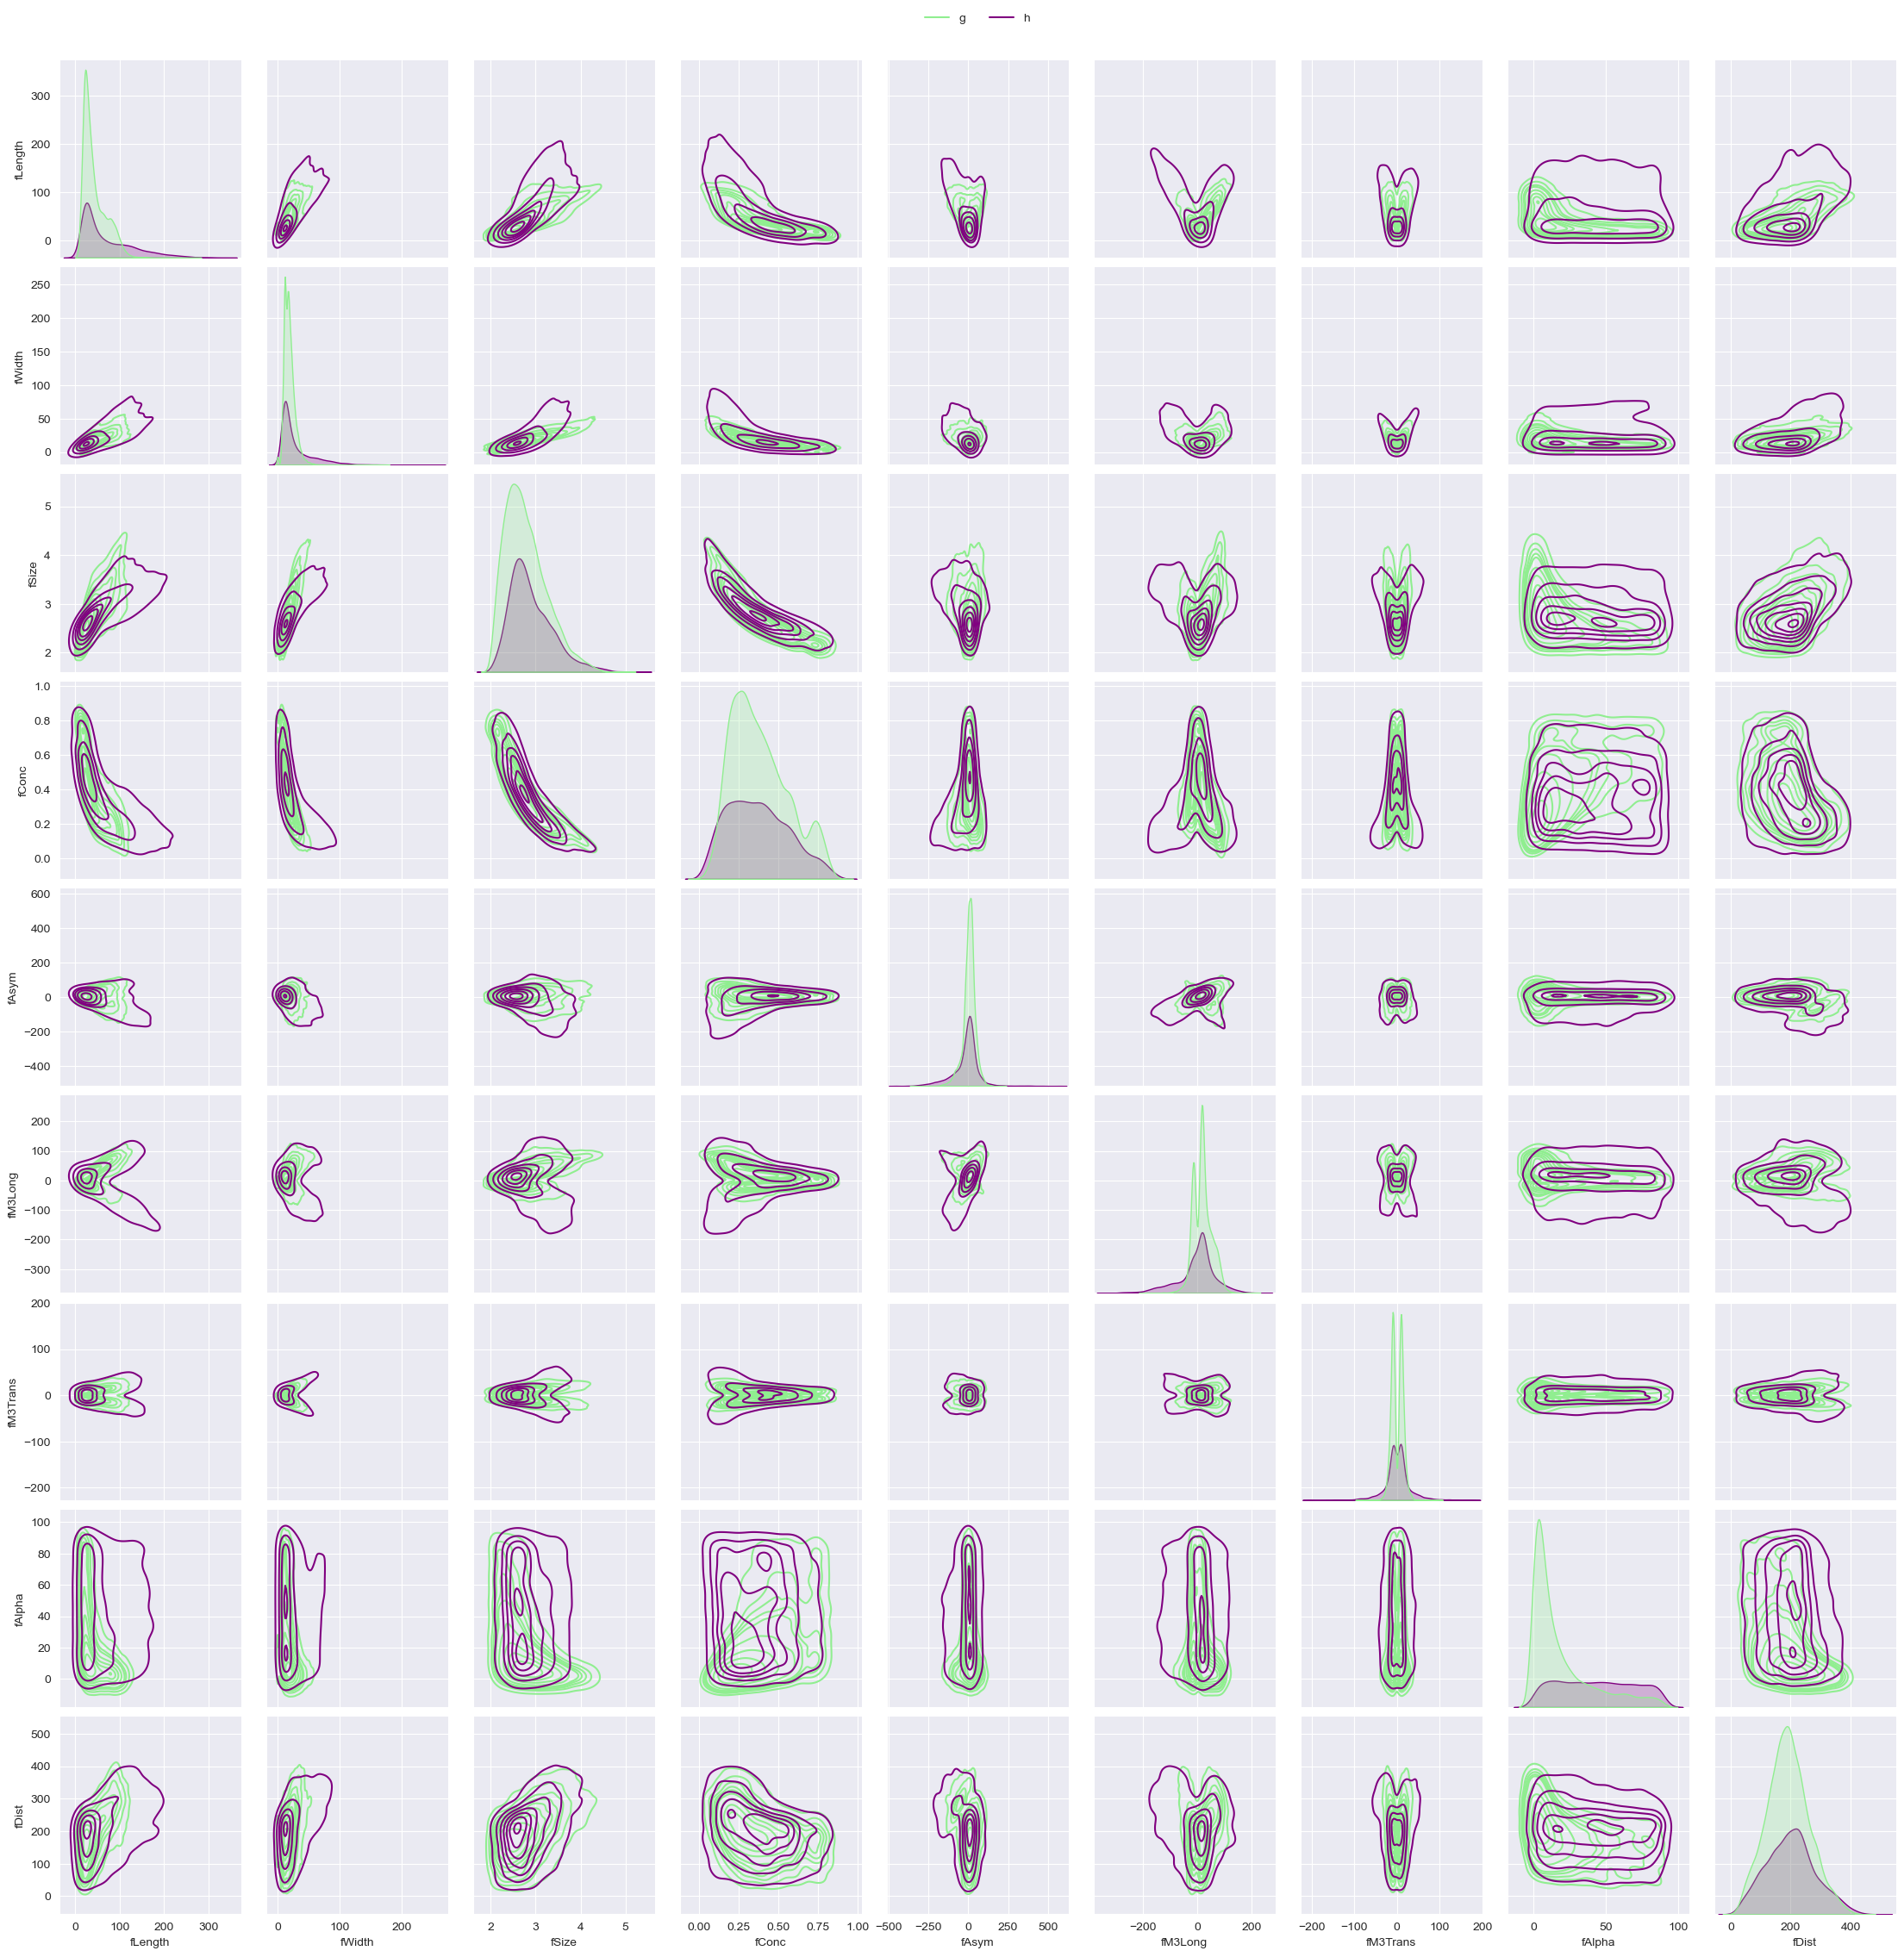

In [18]:
g=sns.pairplot(magic_data, hue="class", kind="kde", palette=colors)
sns.move_legend(g,"lower center", bbox_to_anchor=(.5,1), title=None, ncol=3)

for t, l in zip(g._legend.texts, target_names):
  t.set_text(l)

Матрица на корелација со Пирсонов коефициент

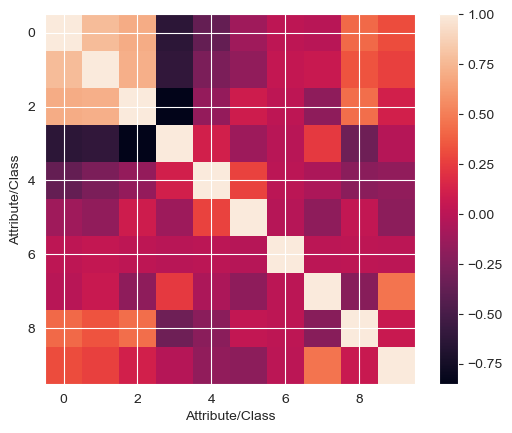

In [13]:
correlation_matrix = np.zeros((number_of_features + 1, number_of_features + 1))

for feature_i in range(number_of_features):
    for feature_j in range(number_of_features):
        corr, _ = stats.pearsonr(X.iloc[:, feature_i], X.iloc[:, feature_j])
        correlation_matrix[feature_i][feature_j] = corr

for feature_i in range(number_of_features):
    target_i=number_of_features
    corr, _ = stats.pearsonr(X.iloc[:, feature_i], y)
    correlation_matrix[feature_i][target_i] = corr
    correlation_matrix[target_i][feature_i] = corr

corr, _ = stats.pearsonr(y, y)
correlation_matrix[target_i][target_i] = corr
corr, _ = stats.pearsonr(X.iloc[:,feature_i], y)

plt.figure()
plt.imshow(correlation_matrix)
plt.xlabel("Attribute/Class")
plt.ylabel("Attribute/Class")
plt.colorbar()
plt.show()

Тренирање на моделите

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75,random_state=42)

QDA = QuadraticDiscriminantAnalysis()

QDA.fit(X_train, y_train)

print("The prior probabilities of the classes are:",QDA.priors_)

The prior probabilities of the classes are: [0.64773922 0.35226078]


In [20]:
y_pred = QDA.predict(X_test)
QDA_accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of classification with the method QDA in the oriinal Magic data set is:",round(QDA_accuracy,3))

The accuracy of classification with the method QDA in the oriinal Magic data set is: 0.788


In [21]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
LDA_accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of classification with the method LDA in the original Magic data set is:",round(LDA_accuracy,3))

The accuracy of classification with the method LDA in the original Magic data set is: 0.787


In [22]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
GNB_accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of classification with the Gaussian Naive Bayes classification in the original Magic data set is:",round(GNB_accuracy,3))

The accuracy of classification with the Gaussian Naive Bayes classification in the original Magic data set is: 0.73


Наивен Баесов кладификатор е најнеточен, бидејќи смета дека атрибутите се независни, а тука не се независни. Точноста на линеарната и квадратната дискриминантна анализа е генерално иста, со малку подобар перформанс на квадратната. Сепак овие модели не се целосно точни, бидејќи класите не се балансирани, а со тоа самиот модел може да има предрасуди кон онаа класа со поголема застапност, во овој случај класа „g“.